In [1]:
from keras.api import layers, models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(1)

from keras.api import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Sentiment has 3 classes

In [2]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.8, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.8, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

2025-02-15 21:44:25.925064: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-15 21:44:25.925097: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-15 21:44:25.925105: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739652265.925541 3927850 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739652265.925820 3927850 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,803 (6.03 MB)

 Trainable params: 1,581,203 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [3]:

from keras.api.utils import plot_model
# plot_model(model, to_file="sentiment_classification_baseline_model.png",show_shapes=True, show_layer_names=True)


In [4]:
df_original = pd.read_csv("../data/processed/processed_tweets.csv")

In [5]:
df_with_unlabeled = df_original.copy()
df_with_unlabeled = df_with_unlabeled[df_with_unlabeled["Sentiment"].isna()]
df_original = df_original.dropna(subset=["Sentiment"])
df_original.info()

df_original["Sentiment"] = df_original["Sentiment"].map({-1: 0, 0: 1, 1: 2})

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           400 non-null    object 
 1   Sentiment      400 non-null    float64
 2   Has opinion    400 non-null    float64
 3   cleaned_text   400 non-null    object 
 4   word_vectors   400 non-null    object 
 5   glove_vectors  400 non-null    object 
dtypes: float64(2), object(4)
memory usage: 21.9+ KB


In [6]:
df_original.head()

,text,Sentiment,Has opinion,cleaned_text,word_vectors,glove_vectors
0,iPad: “Welcome to Apple Intelligence the newes...,0,0.0,ipad welcome apple intelligence new ipad,"[array([-2.04101562e-01, -1.73828125e-01, -2.2...","[array([ 0.11563 , 0.3842 , -0.16833 , 0..."
1,"I believe they call it ""Apple Intelligence"", Sara",1,0.0,believe call apple intelligence sara,"[array([-0.1640625 , 0.01080322, 0.03320312,...","[array([-2.8593e-01, 3.4309e-01, -3.6802e-01,..."
2,"Unfortunately, there's ""Apple Intelligence"" ad...",0,0.0,unfortunately apple intelligence add software ...,"[array([ 8.39233398e-04, 2.33154297e-02, -1.9...","[array([-0.12328 , 0.016084 , -0.196 , 0..."
3,i did turn it off globally but idk how off it ...,1,0.0,turn globally idk truly,"[array([-0.06298828, 0.10693359, -0.00549316,...","[array([ 1.9474e-01, 3.8828e-01, 1.3956e-01,..."
4,"Uh…yeah. Yes, do that, Apple. I’m fine with th...",0,0.0,uhyeah yes apple fine leave intelligence,"[array([ 1.15722656e-01, -1.29882812e-01, 6.5...","[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0...."


In [7]:
df_original["Sentiment"].value_counts()

Sentiment
0    243
1    133
2     24
Name: count, dtype: int64

In [8]:
padded_vectors = np.load("../data/processed/padded_glove_vectors.npy")
padded_vectors = padded_vectors[:400]

In [9]:
padded_vectors.shape

(400, 26, 300)

In [10]:
# padded_vectors_average = np.mean(padded_vectors, axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded_vectors, df_original["Sentiment"], test_size=0.2, random_state=1, stratify=df_original["Sentiment"])

In [12]:
X_train.shape

(320, 26, 300)

In [13]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 195
1: 106
2: 19


In [14]:
y_train.shape

(320,)

In [15]:
history = model.fit(x=X_train, y=y_train, epochs=50)

Epoch 1/50


2025-02-15 21:44:36.075577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3399 - loss: 1.5622
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3566 - loss: 1.4321
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3771 - loss: 1.3992
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4073 - loss: 1.4350
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4073 - loss: 1.3195
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4655 - loss: 1.1875
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4981 - loss: 1.1358
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5117 - loss: 1.1561
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5581 - loss: 1.0251
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4600 - loss: 1.1122
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5361 - loss: 1.0175
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5651 - l

In [16]:
history.history

{'accuracy': [0.33125001192092896,
  0.36250001192092896,
  0.37187498807907104,
  0.4124999940395355,
  0.43437498807907104,
  0.453125,
  0.5062500238418579,
  0.48124998807907104,
  0.512499988079071,
  0.4937500059604645,
  0.518750011920929,
  0.550000011920929,
  0.574999988079071,
  0.5218750238418579,
  0.543749988079071,
  0.581250011920929,
  0.6000000238418579,
  0.6343749761581421,
  0.6312500238418579,
  0.6156250238418579,
  0.606249988079071,
  0.625,
  0.6937500238418579,
  0.6343749761581421,
  0.628125011920929,
  0.699999988079071,
  0.671875,
  0.690625011920929,
  0.6812499761581421,
  0.668749988079071,
  0.6781250238418579,
  0.7093750238418579,
  0.7093750238418579,
  0.7093750238418579,
  0.721875011920929,
  0.7875000238418579,
  0.734375,
  0.7093750238418579,
  0.7124999761581421,
  0.746874988079071,
  0.7749999761581421,
  0.8031250238418579,
  0.7593749761581421,
  0.7906249761581421,
  0.746874988079071,
  0.8031250238418579,
  0.793749988079071,
  0.781

In [17]:
model.save("../models/sentiment_classification_model_original.keras")

Text(0.5, 0, 'epoch')

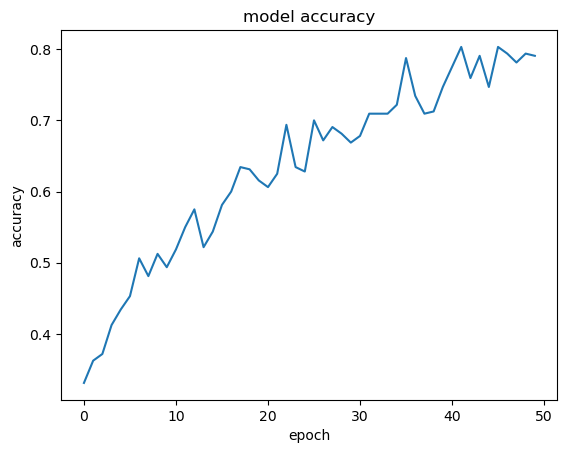

In [18]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

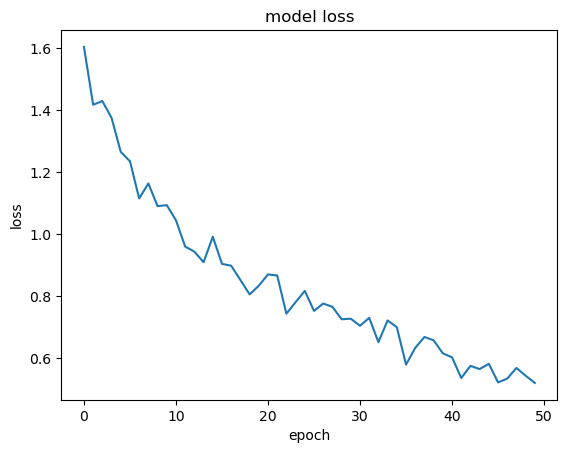

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [20]:
evaluation = model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6477 - loss: 0.7972 


In [21]:
print(f'Loss: {evaluation[0]}, accuracy: {evaluation[1]}')

Loss: 0.7640633583068848, accuracy: 0.6625000238418579


### Confusion matrix

In [22]:
y_test

10     0
2      0
94     0
336    0
391    0
      ..
227    0
9      0
236    0
199    0
330    1
Name: Sentiment, Length: 80, dtype: int64

In [23]:
predictions = model.predict(X_test).argmax(axis=1)
print("Unique values in predictions:", np.unique(predictions))

print("Unique values in y_test:", np.unique(y_test))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Unique values in predictions: [0 1]
Unique values in y_test: [0 1 2]


[[43  5  0]
 [17 10  0]
 [ 5  0  0]]


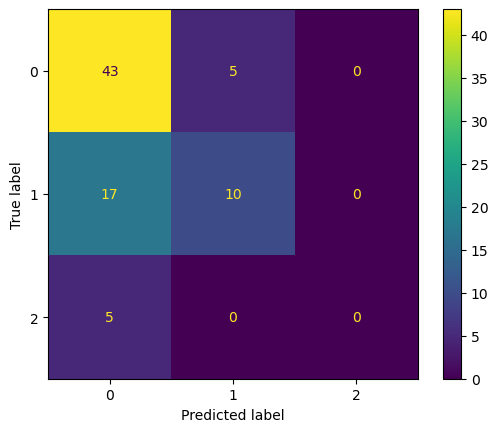

In [24]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [25]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.8, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.8, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,803 (6.03 MB)

 Trainable params: 1,581,203 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [26]:
df_with_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7491 entries, 400 to 7890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           7491 non-null   object 
 1   Sentiment      0 non-null      float64
 2   Has opinion    0 non-null      float64
 3   cleaned_text   7486 non-null   object 
 4   word_vectors   7491 non-null   object 
 5   glove_vectors  7491 non-null   object 
dtypes: float64(2), object(4)
memory usage: 409.7+ KB


In [27]:
unlabeled_padded_vectors = np.load("../data/processed/padded_glove_vectors.npy")[401:]
# unlabeled_padded_vectors = unlabeled_padded_vectors.mean(axis=1)
unlabeled_padded_vectors.shape

(7490, 26, 300)

In [28]:
print("Labeled data shape:", padded_vectors.shape)  # Expect (198, 300)
print("Unlabeled data shape:", unlabeled_padded_vectors.shape)  # Expect (n, 300)


Labeled data shape: (400, 26, 300)
Unlabeled data shape: (7490, 26, 300)


In [29]:

from scripts.DataDistillation import DataDistillation


distillation = DataDistillation(
    model,
    (padded_vectors, df_original["Sentiment"]),
    unlabeled_padded_vectors, epochs=50, pseudo_batch_size=1000, random_state=1, validation_split=0.2, should_stratify=True
)


In [30]:
distillation.start()

Starting Data Distillation
Training model on labeled training data...
Evaluating model on internal validation set...
Teacher performance on internal validation set: 0.6625000238418579
Starting iteration 1
Teacher predicting next unlabeled data batch with shape: (1000, 26, 300)
Pseudo-labeled samples in this iteration: 1000
Training student on combined data with size (812, 26, 300)
Evaluating model on internal validation set...
Student performance on internal validation set: 0.637499988079071
Student did not outperform teacher. Stopping data distillation.
Data distillation process completed.
Final teacher performance on internal validation set: 0.6625000238418579


In [ ]:
matrix = confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))
display = ConfusionMatrixDisplay(matrix)
display.plot()